In [1]:
import sys
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../data')

from src.ablate_heads import Ablate, AblateMultiLen, OVCircuit
from src.dataset import TlensDataset
# from src.dataset import MyDataset
from src.model import WrapHookedTransformer
from src.myplot import plot_heatmaps, barplot_head
import torch
torch.set_grad_enabled(False)
%load_ext autoreload
%autoreload 2

In [2]:
model = WrapHookedTransformer.from_pretrained("gpt2", device="cuda", refactor_factored_attn_matrices=True)


# dataset = TlensDataset("../data/full_data_sampled_gpt2.json", model, slice=100)

# dataset = MyDataset("../data/counterfact_small_15_final.json", model)
# dataset = MyDataset("../data/full_data.json", model.tokenizer, slice=1000)
print(dataset.get_lengths())
# ablate_multi = AblateMultiLen(dataset, model, 40)

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2 into HookedTransformer


NameError: name 'dataset' is not defined

## Ablate the heads

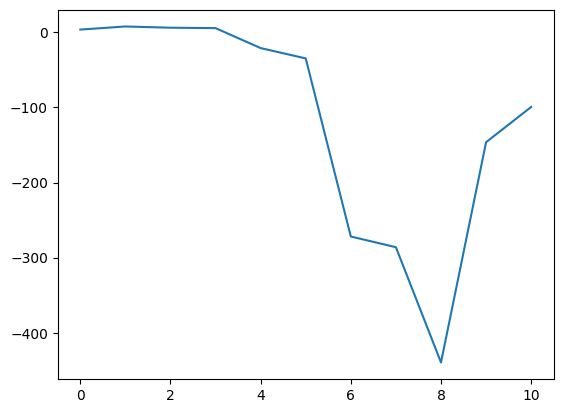

In [57]:
import matplotlib.pyplot as plt
# plt.plot(examples_cp.mean(-1)[1:])
plt.plot(examples_mem.mean(-1)[1:])

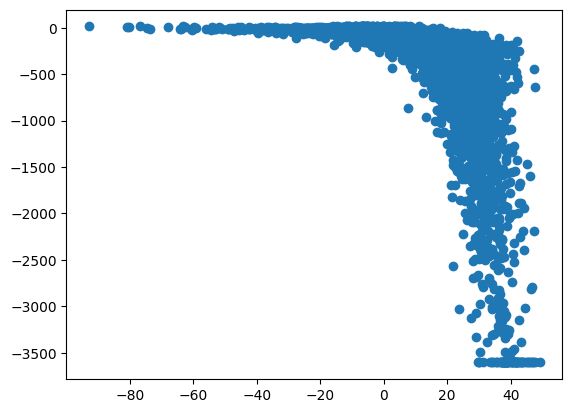

In [55]:
#scatter plot
plt.scatter(examples_cp[8], examples_mem[8])

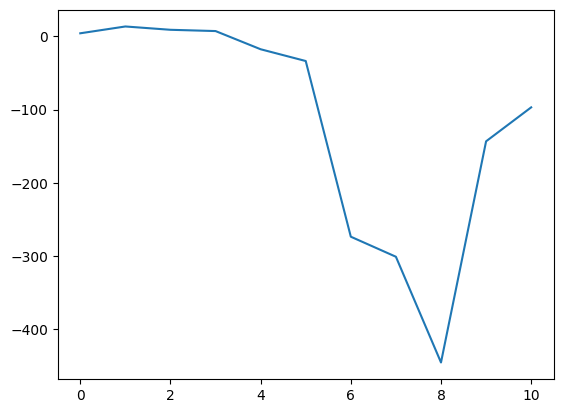

In [12]:
import matplotlib.pyplot as plt
plt.plot(examples_mem.mean(-1)[1:])

In [4]:
A = model.W_U.T

In [101]:
model.to_tokens("Apple Google")

tensor([[50256, 16108,  3012]], device='cuda:0')

In [121]:
index = 3012
significant = ((A[index,:]>  A[index,:].mean() + A[index,:].std()*2) | (A[index,:]<- A[index,:].std()*2))
indices = torch.where(significant)[0]
baisi_vectors_google = torch.eye(A.size(1))[indices.cpu()]

In [103]:
index = 16108
significant = ((A[index,:]> A[index,:].std()*2) | (A[index,:]<- A[index,:].std()*2))
indices = torch.where(significant)[0]
baisi_vectors_apple = torch.eye(A.size(1))[indices.cpu()]

In [122]:
baisi_vectors_google.shape

torch.Size([31, 768])

In [123]:
common_basis.shape

torch.Size([7, 768])

In [104]:
comparison = baisi_vectors_apple.unsqueeze(1) == baisi_vectors_google.unsqueeze(0)
torch.where(comparison.all(dim=2))[0]
common_basis = baisi_vectors_apple[torch.where(comparison.all(dim=2))[0],:]

In [120]:
(common_basis.cuda() @ vector).norm()

tensor(26.9479, device='cuda:0')

In [119]:
_,cache = model.run_with_cache("iPhone was developed by Google. Iphone was developed by")
vector = cache["resid_post",11][0,-1,:]

In [3]:
ablate_multi = AblateMultiLen(dataset, model, 40)
examples_mem, examples_cp = ablate_multi.ablate_multi_len(ablate_target="attn")

Ablating examples of length 25 ...


100%|██████████| 24/24 [00:03<00:00,  6.87it/s]


Number of examples where mem > cp: 33


Ablating batches:   0%|          | 0/24 [00:00<?, ?it/s]

layer 8
Number of examples where mem > cp: 1


Ablating batches:   4%|▍         | 1/24 [00:02<00:47,  2.05s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 1


Ablating batches:   8%|▊         | 2/24 [00:04<00:45,  2.09s/it]

layer 11
Number of examples where mem > cp: 0
layer 8
Number of examples where mem > cp: 1


Ablating batches:  12%|█▎        | 3/24 [00:06<00:43,  2.06s/it]

layer 11
Number of examples where mem > cp: 0
layer 8
Number of examples where mem > cp: 1


Ablating batches:  17%|█▋        | 4/24 [00:08<00:40,  2.02s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 0


Ablating batches:  21%|██        | 5/24 [00:10<00:38,  2.00s/it]

layer 11
Number of examples where mem > cp: 0
layer 8
Number of examples where mem > cp: 1


Ablating batches:  25%|██▌       | 6/24 [00:12<00:36,  2.04s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 1


Ablating batches:  29%|██▉       | 7/24 [00:14<00:34,  2.05s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 0


Ablating batches:  33%|███▎      | 8/24 [00:16<00:32,  2.04s/it]

layer 11
Number of examples where mem > cp: 0
layer 8
Number of examples where mem > cp: 2


Ablating batches:  38%|███▊      | 9/24 [00:18<00:29,  2.00s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 4


Ablating batches:  42%|████▏     | 10/24 [00:20<00:28,  2.00s/it]

layer 11
Number of examples where mem > cp: 2
layer 8
Number of examples where mem > cp: 1


Ablating batches:  46%|████▌     | 11/24 [00:22<00:25,  1.97s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 2


Ablating batches:  50%|█████     | 12/24 [00:24<00:23,  1.95s/it]

layer 11
Number of examples where mem > cp: 2
layer 8
Number of examples where mem > cp: 2


Ablating batches:  54%|█████▍    | 13/24 [00:25<00:21,  1.93s/it]

layer 11
Number of examples where mem > cp: 2
layer 8
Number of examples where mem > cp: 0


Ablating batches:  58%|█████▊    | 14/24 [00:27<00:19,  1.93s/it]

layer 11
Number of examples where mem > cp: 0
layer 8
Number of examples where mem > cp: 2


Ablating batches:  62%|██████▎   | 15/24 [00:29<00:17,  1.93s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 1


Ablating batches:  67%|██████▋   | 16/24 [00:31<00:15,  1.95s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 2


Ablating batches:  71%|███████   | 17/24 [00:33<00:13,  1.94s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 1


Ablating batches:  75%|███████▌  | 18/24 [00:35<00:11,  1.96s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 1


Ablating batches:  79%|███████▉  | 19/24 [00:37<00:09,  1.96s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 4


Ablating batches:  83%|████████▎ | 20/24 [00:39<00:07,  1.96s/it]

layer 11
Number of examples where mem > cp: 3
layer 8
Number of examples where mem > cp: 2


Ablating batches:  88%|████████▊ | 21/24 [00:41<00:05,  1.97s/it]

layer 11
Number of examples where mem > cp: 2
layer 8
Number of examples where mem > cp: 3


Ablating batches:  92%|█████████▏| 22/24 [00:43<00:03,  1.96s/it]

layer 11
Number of examples where mem > cp: 3
layer 8
Number of examples where mem > cp: 1


Ablating batches:  96%|█████████▌| 23/24 [00:45<00:01,  1.95s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 2


Ablating batches: 100%|██████████| 24/24 [00:47<00:00,  1.98s/it]

layer 11
Number of examples where mem > cp: 1
Ablating examples of length 21 ...



100%|██████████| 47/47 [00:05<00:00,  8.48it/s]


Number of examples where mem > cp: 51


Ablating batches:   0%|          | 0/47 [00:00<?, ?it/s]

layer 8
Number of examples where mem > cp: 3


Ablating batches:   2%|▏         | 1/47 [00:01<01:18,  1.72s/it]

layer 11
Number of examples where mem > cp: 2
layer 8
Number of examples where mem > cp: 1


Ablating batches:   4%|▍         | 2/47 [00:03<01:17,  1.72s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 0


Ablating batches:   6%|▋         | 3/47 [00:05<01:15,  1.71s/it]

layer 11
Number of examples where mem > cp: 0
layer 8
Number of examples where mem > cp: 1


Ablating batches:   9%|▊         | 4/47 [00:06<01:12,  1.69s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 2


Ablating batches:  11%|█         | 5/47 [00:08<01:11,  1.71s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 2


Ablating batches:  13%|█▎        | 6/47 [00:10<01:10,  1.73s/it]

layer 11
Number of examples where mem > cp: 0
layer 8
Number of examples where mem > cp: 0


Ablating batches:  15%|█▍        | 7/47 [00:12<01:09,  1.74s/it]

layer 11
Number of examples where mem > cp: 0
layer 8
Number of examples where mem > cp: 0


Ablating batches:  17%|█▋        | 8/47 [00:13<01:07,  1.72s/it]

layer 11
Number of examples where mem > cp: 0
layer 8
Number of examples where mem > cp: 1


Ablating batches:  19%|█▉        | 9/47 [00:15<01:06,  1.76s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 2


Ablating batches:  21%|██▏       | 10/47 [00:17<01:04,  1.75s/it]

layer 11
Number of examples where mem > cp: 1
layer 8
Number of examples where mem > cp: 1


Ablating batches:  23%|██▎       | 11/47 [00:19<01:03,  1.78s/it]

layer 11
Number of examples where mem > cp: 0
layer 8
Number of examples where mem > cp: 1


Ablating batches:  26%|██▌       | 12/47 [00:20<01:01,  1.77s/it]

layer 11
Number of examples where mem > cp: 1


Ablating batches:  26%|██▌       | 12/47 [00:21<01:03,  1.83s/it]


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_160050/831892786.py:2 in <module>                                          │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_160050/831892786.py'                 │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/ablate_heads.py:319 │
│ in ablate_multi_len                                                                       │
│                                                                                           │
│   316 │   │   result_cp = torch.cat(list(result_cp_per_len.values()), dim=-1)             │
│   317 │   │   result_mem = torch.cat(list(result_mem_per_len.values()), dim=-1)           │
│   318 │   │                                                                               │
│ ❱ 319 │   │   print("result_cp.shape", result_cp.shape)                                   │
│   320 │   │                                                                               │
│   321 │   │                                                                               │
│   322 │   │   return result_mem, result_cp                                                │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/ablate_heads.py:308 │
│ in ablate_single_len                                                                      │
│                                                                                           │
│   305 │   │   # lenghts = [11]                                                            │
│   306 │   │   result_cp_per_len = {}                                                      │
│   307 │   │   result_mem_per_len = {}                                                     │
│ ❱ 308 │   │   result_cp_base_per_len = {}                                                 │
│   309 │   │   result_mem_base_per_len = {}                                                │
│   310 │   │   for l in lenghts:                                                           │
│   311 │   │   │   print("Ablating examples of length", l, "...")                          │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/ablate_heads.py:263 │
│ in ablate_attn_block                                                                      │
│                                                                                           │
│   260 │   │   │   │   )[:, -1, :]                                                         │
│   261 │   │   │   │   if logit.shape[0] != self.batch_size:                               │
│   262 │   │   │   │   │   print("Ops, the batch size is not correct")                     │
│ ❱ 263 │   │   │   │   mem, cp = to_logit_token(logit, batch["target"])                    │
│   264 │   │   │   │   # norm_mem, norm_cp = normalize_logit_token(mem, cp, baseline="corr │
│   265 │   │   │   │   examples_mem[layer,  idx, :] = mem.cpu()                            │
│   266 │   │   │   │   examples_cp[layer,  idx, :] = cp.cpu()                              │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/ablate_heads.py:27  │
│ in to_logit_token                                                                         │
│                                                                                           │
│    24 │   logit_cp = torch.zeros(target.shape[0])                                         │
│    25 │   for i in range(target.shape[0]):        

In [50]:
examples_cp = torch.load("../results/gpt2_examples_cp.pt")
examples_mem = torch.load("../results/gpt2_examples_mem.pt")

In [43]:
# cap using 1% percentile
examples_cp = torch.clamp(examples_cp, min=examples_cp.flatten().kthvalue(int(0.01*examples_cp.flatten().size(0))).values, max = examples_cp.flatten().kthvalue(int(0.99*examples_cp.flatten().size(0))).values)
examples_mem = torch.clamp(examples_mem, min=examples_mem.flatten().kthvalue(int(0.01*examples_mem.flatten().size(0))).values, max=examples_mem.flatten().kthvalue(int(0.99*examples_mem.flatten().size(0))).values)

In [18]:
#find the head with highest variance and median 0
variance = examples_cp.var(dim=-1)
median = examples_cp.median(dim=-1).values
#Select the head with highest variance and median 0
head = variance.argmax().item()


In [21]:
variance.shape

torch.Size([12, 12])

tensor(132)

In [5]:
# torch.save(examples_cp, "../results/gpt2_examples_cp_cap.pt")
# torch.save(examples_mem, "../results/gpt2_examples_mem_cap.pt")

torch.Size([12, 12, 9200])

torch.Size([12, 12, 9200])
torch.Size([12, 12, 9200])
Pearson correlation between cp and mem:  tensor(-0.2432)


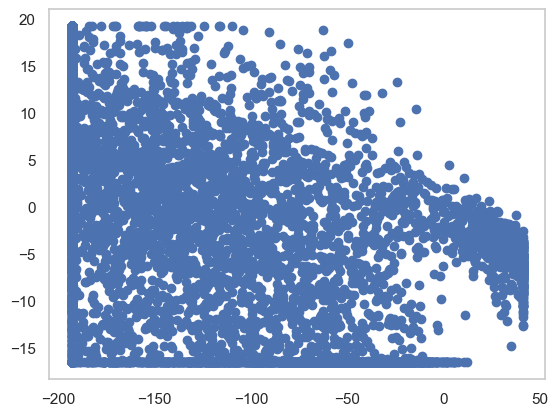

In [279]:

print(examples_cp.size())
print(examples_mem.size())
#print pearson correlation
print("Pearson correlation between cp and mem: ", torch.nn.functional.cosine_similarity(examples_cp[11,0], examples_mem[11,0], dim=0))
# plot scatter plot
import matplotlib.pyplot as plt
plt.scatter(examples_cp[11,0], examples_mem[11,0])

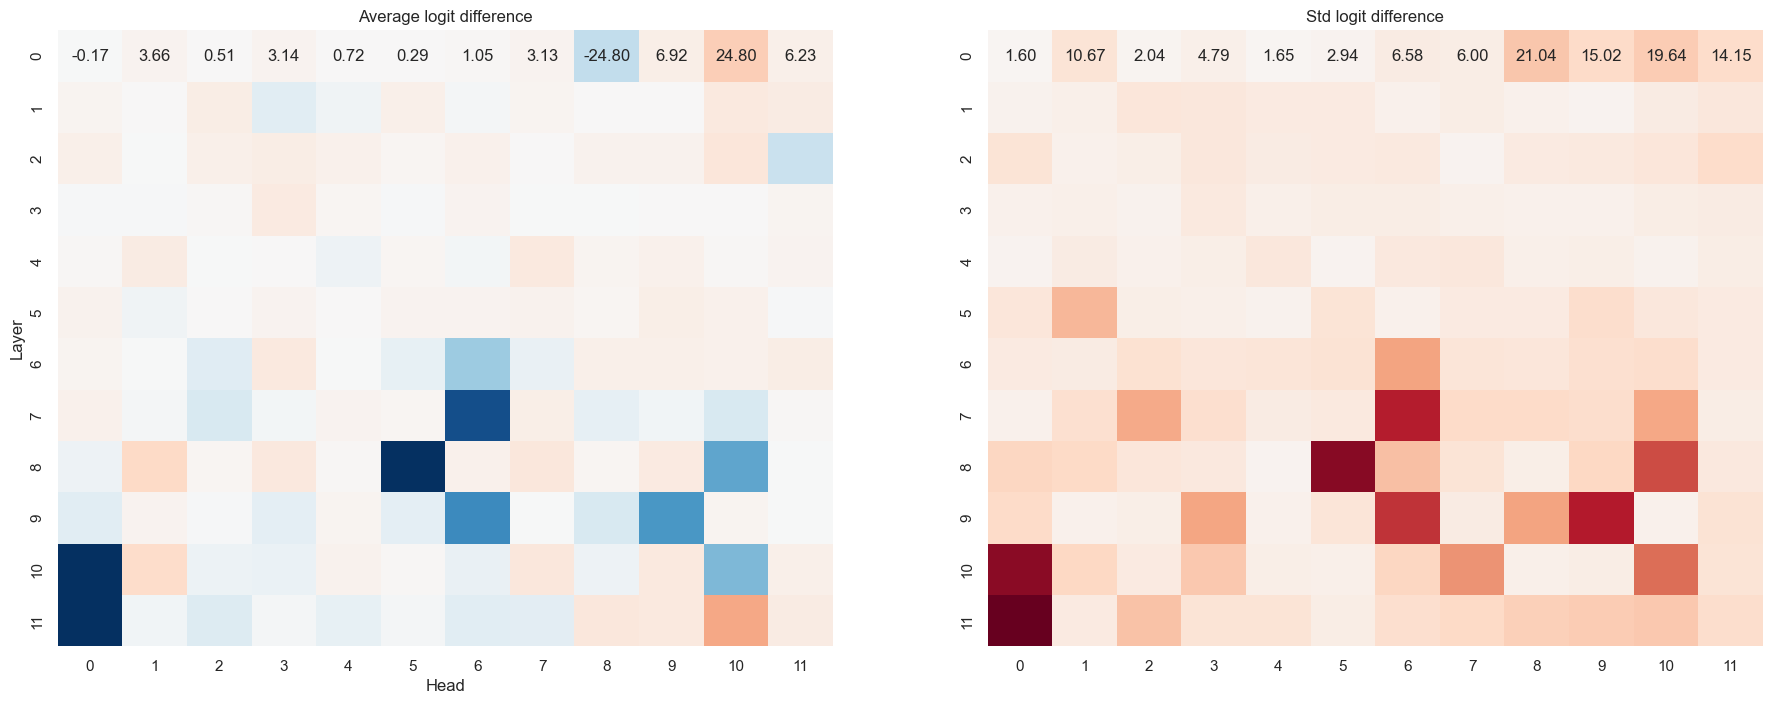

In [257]:
plot_heatmaps(examples_cp.mean(-1), examples_cp.std(-1), title="ciao", interval=100)

In [8]:
import pandas as pd
from tqdm import tqdm
# create a dataframe with column (example, head, layer, cp_value, mem_value)
data = []
for i in tqdm(range(examples_cp.shape[-1]), total=examples_cp.shape[-1]):
    for layer in range(examples_cp.shape[0]):
        for head in range(examples_mem.shape[1]):
            data.append(
                {
                    "example": i,
                    "head": f"L{layer}H{head}",
                    "cp_value": examples_cp[layer, head,i].item(),
                    "mem_value": examples_mem[layer, head,i].item()
                }
            )
df = pd.DataFrame(data)
df.to_csv("../results/plot_data/gpt2_df_head.csv")

  0%|          | 0/9200 [00:00<?, ?it/s]100%|██████████| 9200/9200 [00:17<00:00, 512.67it/s]


In [9]:
#count the number of positive and negative examples for each head
def count_number(examples_mem:torch.TensorType, examples_cp:torch.TensorType):
    import pandas as pd
    df = []
    for layer in range(examples_mem.shape[0]):
        for head in range(examples_mem.shape[1]):
            mem_negative_count = (examples_mem[ layer, head,:] < 0).sum()
            cp_negative_count = (examples_cp[layer, head,:] < 0).sum()
            mem_positive_count = (examples_mem[ layer, head,:] > 0).sum()
            cp_positive_count = (examples_cp[layer, head,:] > 0).sum()
            df.append(
                {
                    "head": f"L{layer}H{head}",
                    "mem_positive": mem_positive_count.item(),
                    "mem_negative": mem_negative_count.item(),
                    "cp_positive": cp_positive_count.item(),
                    "cp_negative": cp_negative_count.item(),
                    "total": examples_cp.shape[-1]
                }
            )
    df = pd.DataFrame(df)
    return df

In [10]:
df= count_number(examples_mem, examples_cp)
df.to_csv("../results/plot_data/gpt2_count.csv")

In [25]:
normalized_cp = torch.zeros_like(examples_mem)
for layer in range(examples_cp.shape[0]):
    for head in range(examples_cp.shape[1]):
        #max-min normalization 
        normalized_cp[layer, head, :] = (examples_cp[layer, head, :] - examples_cp[layer, head, :].mean().unsqueeze(-1)) / examples_cp[layer, head, :].std().unsqueeze(-1)

In [34]:
((examples_cp[layer, head, :] - examples_cp[layer, head, :].mean())/ examples_cp[layer, head, :].std().unsqueeze(-1)).std(-1)

tensor(1.)

<Axes: >

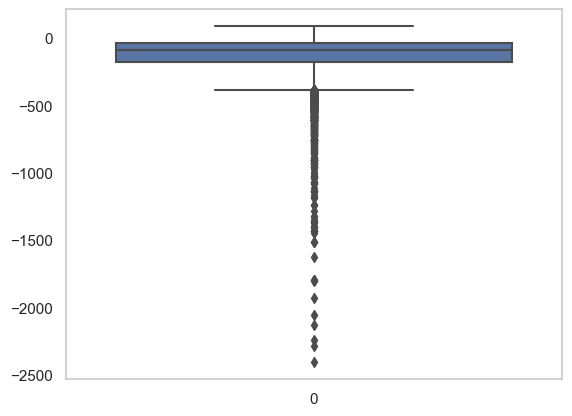

In [294]:
#plot a boxplot for a single head
import seaborn as sns
sns.boxplot(data=examples_cp[10,0].numpy())

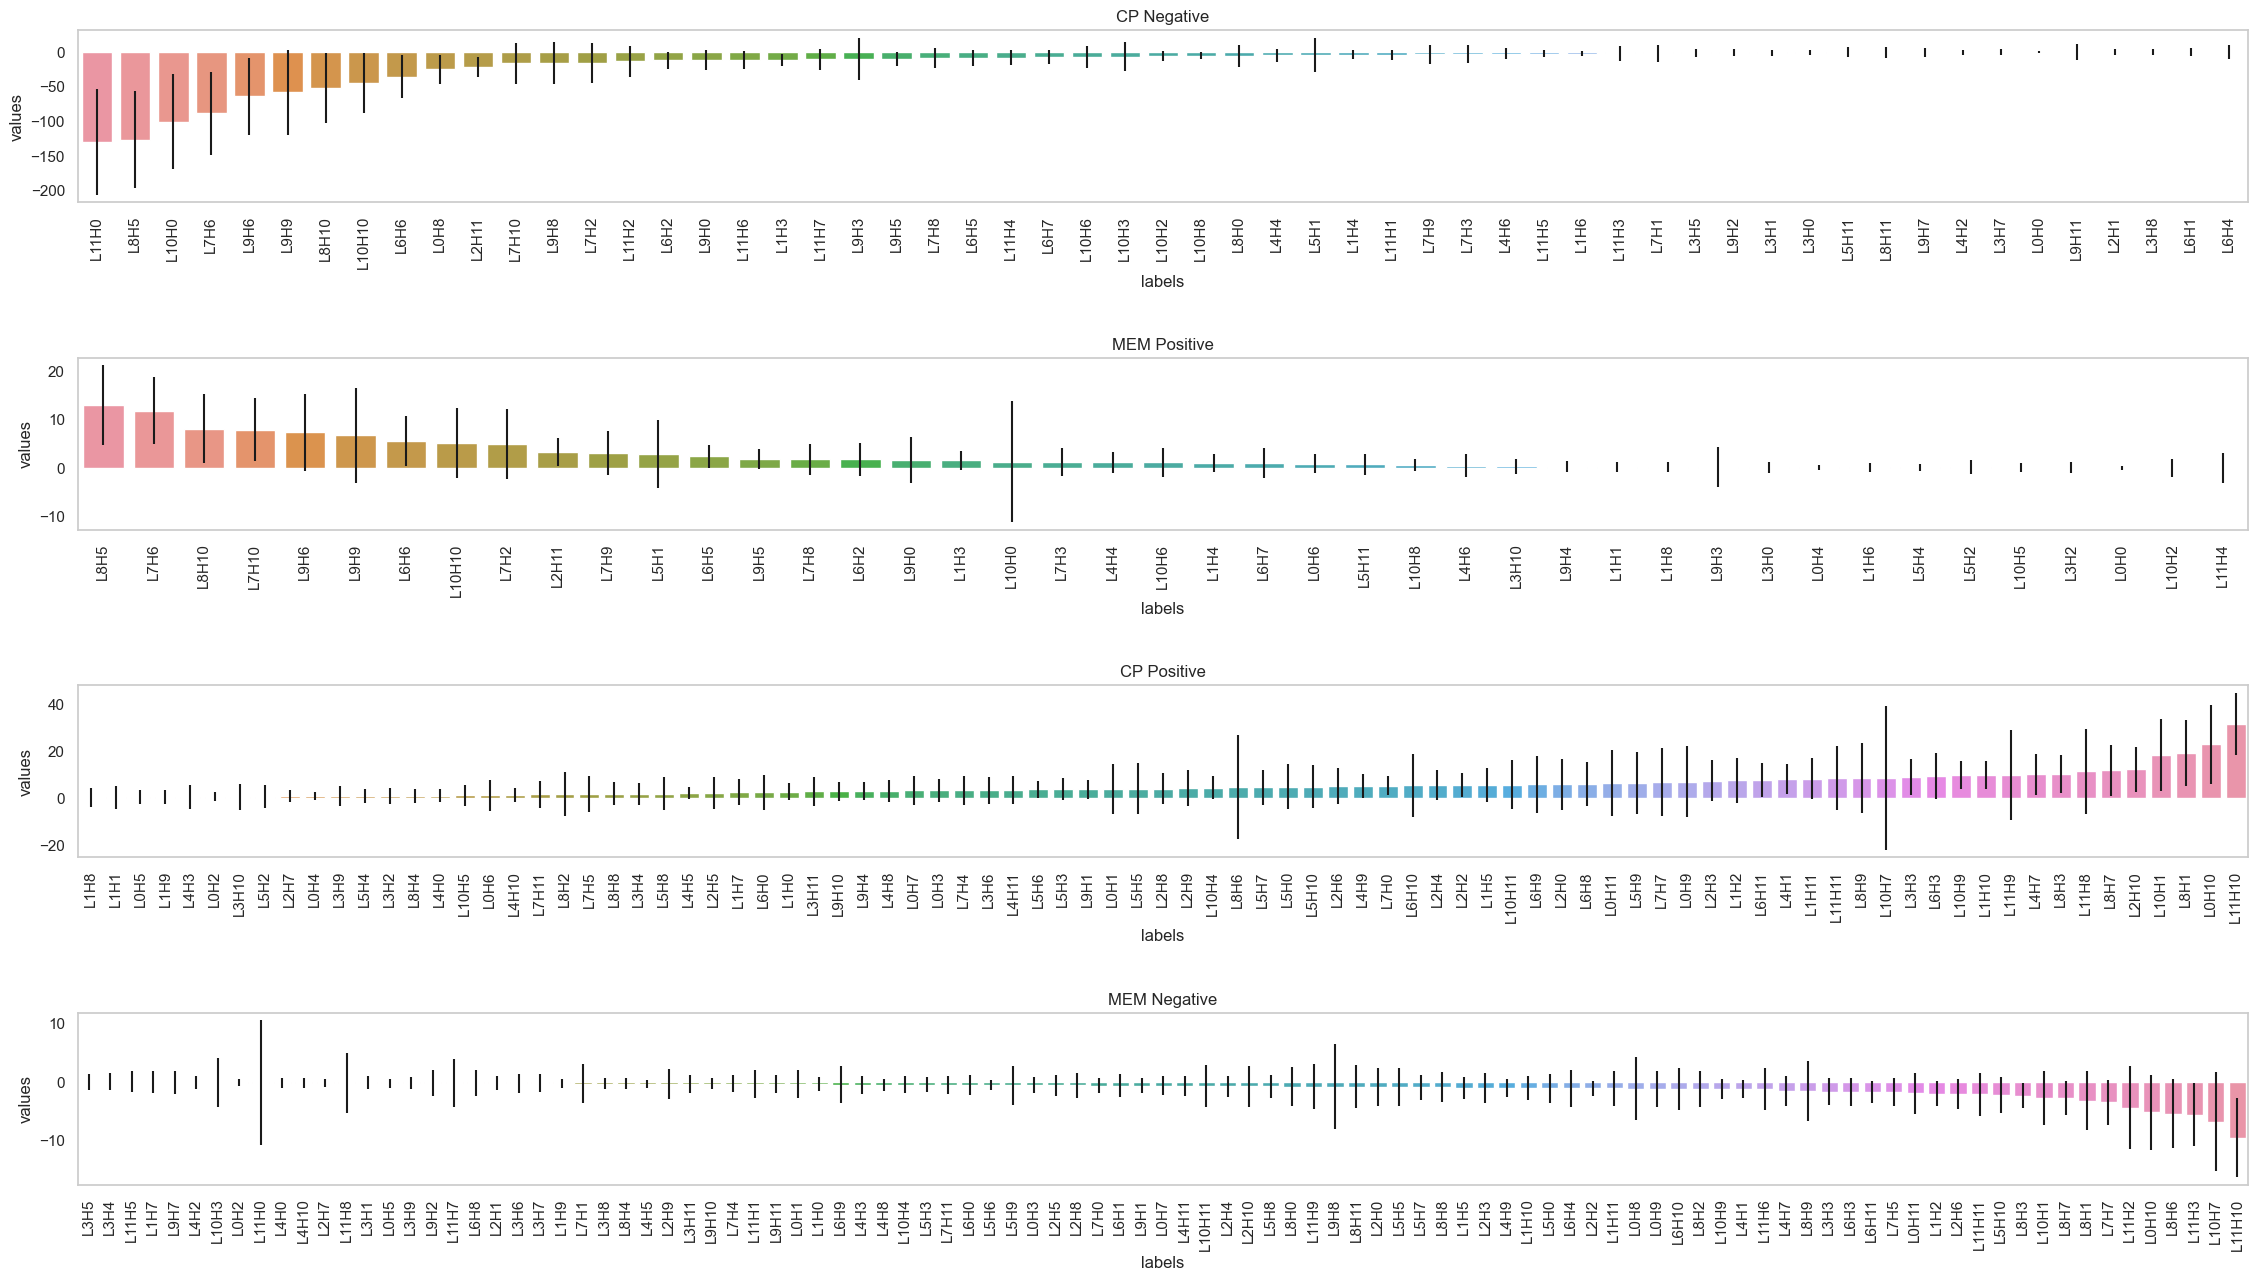

In [11]:
df_mem, df_cp = barplot_head(examples_cp=examples_cp, examples_mem=examples_mem)

# # save df
df_mem.to_csv("../results/plot_data/df_mem_gpt2.csv")
df_cp.to_csv("../results/plot_data/df_cp_gpt2.csv")

In [ ]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create example tensors for mean and std
mean_tensor = examples_cp.mean(-1)
std_tensor = examples_cp.std(-1)

# Convert tensors to NumPy arrays
mean_np = mean_tensor.numpy()
std_np = std_tensor.numpy()

# Create an empty DataFrame
# df = pd.DataFrame(columns=['Mean', 'Std', 'Layer', 'Head'])
df = []
# Populate the DataFrame
for i in range(12):
    for j in range(12):
        df.append({
            'Mean': mean_np[i, j],
            'Std': std_np[i, j],
            'Layer': f'L{i}',
            'Head': f'H{j}'
        })
df = pd.DataFrame(df)
# Increase the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create the Seaborn plot
sns.scatterplot(x='Std', y='Mean', hue='Layer', style='Head', data=df, s=100)

# Add title and labels
plt.title('Mean vs Standard Deviation for Layers and Heads')
plt.xlabel('Mean')
plt.ylabel('Std')

# # Add labels to points with adjusted positions to avoid overlap
# for i in range(len(df)):
#     plt.text(df['Mean'][i] + 0.005, df['Std'][i], f"{df['Layer'][i]}{df['Head'][i]}")

# # Show legend
# plt.legend()

# Finally, show the plot
plt.show()

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create example tensors for mean and std
mean_tensor = examples_mem.mean(-1)
std_tensor = examples_mem.std(-1)

# Convert tensors to NumPy arrays
mean_np = mean_tensor.numpy()
std_np = std_tensor.numpy()

# Create an empty DataFrame
# df = pd.DataFrame(columns=['Mean', 'Std', 'Layer', 'Head'])
df = []
# Populate the DataFrame
for i in range(12):
    for j in range(12):
        df.append({
            'Mean': mean_np[i, j],
            'Std': std_np[i, j],
            'Layer': f'L{i}',
            'Head': f'H{j}'
        })
df = pd.DataFrame(df)
# Increase the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create the Seaborn plot
sns.scatterplot(x='Std', y='Mean', hue='Layer', style='Head', data=df, s=100)

# Add title and labels
plt.title('Mean vs Standard Deviation for Layers and Heads')
plt.xlabel('Mean')
plt.ylabel('Std')

# # Add labels to points with adjusted positions to avoid overlap
# for i in range(len(df)):
#     plt.text(df['Mean'][i] + 0.005, df['Std'][i], f"{df['Layer'][i]}{df['Head'][i]}")

# # Show legend
# plt.legend()

# Finally, show the plot
plt.show()


In [ ]:
plot_heatmaps(examples_cp.mean(-1), examples_cp.std(-1), "Average logit difference", 60, save=False)
plot_heatmaps(examples_mem.mean(-1), examples_mem.std(-1), "Average logit difference", 30, save=False)

## Study the OV circuit for the heads and the residual stream

In [3]:
ovcircuit = OVCircuit(model, dataset, 40, filter_outliers=False)

OV circuit at all heads 15: 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


Error in plotting, probably due to Matplotlib version (3.5.3 should work)


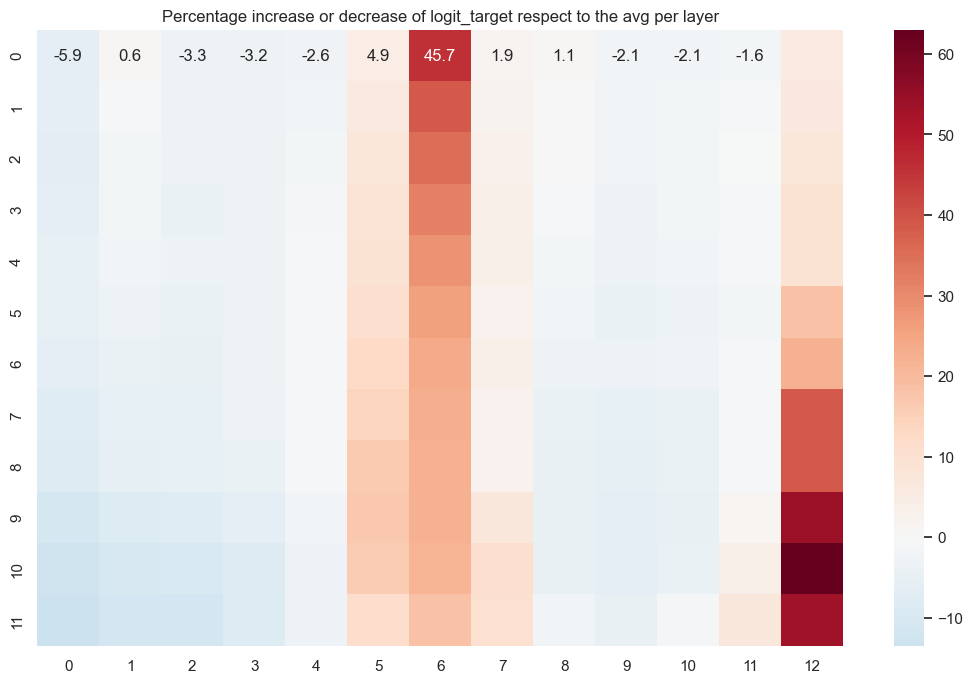

In [8]:
score = ovcircuit.residual_stram_track_target_all_len( target="copy" , plot=True)
torch.save(score, "../results/gpt2_residual_stream_mem.json")

In [10]:
from plotnine import ggplot, aes, geom_point, geom_tile, theme_minimal, labs,scale_fill_gradientn, scales
# from plotnine.scales import scale_fill_gradientn2
# from score tesnor to dataframe
import pandas as pd
scoredf = pd.DataFrame(score)
scoredf = scoredf.reset_index().melt(id_vars=['index'], var_name='column', value_name='value')
#save
scoredf.to_csv("../results/plot_data/gpt2_residual_stream_copy.csv")
(ggplot(scoredf, aes(x='column', y='index', fill='value')) +
 geom_point(shape="o", stroke=0, size=9)+
#  geom_tile() +  # This creates the heatmap tiles
 scales.scale_fill_gradientn(colors=["#FF0000","#FFFFFF", "#000FFF"]) +  # Gradient color scale
 theme_bw() +  # Minimal theme
 labs(x='Postion', y='Layers', fill='Value')  # Labels
)

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_53639/80989976.py:13 in <module>                                           │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_53639/80989976.py'                   │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'theme_bw' is not defined

In [ ]:
score = ovcircuit.residual_stram_track_target_all_len(target="copy" , plot=True)

In [ ]:
copy_score = ovcircuit.compute_copy_score_all_heads(resid_layer_input=0, resid_pos="definition",  target="copy", plot=True, logit_score=True)

In [ ]:
mem_score = ovcircuit.compute_copy_score_all_heads(resid_layer_input=0, resid_pos="1_1_subject",  target="mem", plot=True, logit_score=True)

In [ ]:
threshold = mem_score.mean() + mem_score.std()
# select tuple (layer, head) with score above threshold
selected_heads_mem = torch.nonzero(mem_score > threshold).tolist()
print(selected_heads_mem)


In [ ]:
ovcircuit.compute_copy_score_all_heads(resid_layer_input=0, resid_pos="1_1_subject",  target="mem", plot=True, logit_score=True)

<Axes: >

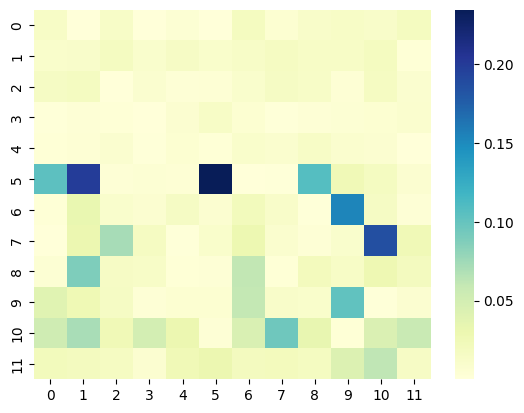

In [23]:
from transformer_lens import head_detector
dataloader = torch.utils.data.DataLoader(dataset, batch_size=200, shuffle=False)
batch = next(iter(dataloader))

ind_head = head_detector.detect_head(model, batch["corrupted_prompts"], detection_pattern="induction_head")

#plot heatmap for ind_head
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(ind_head, cmap="YlGnBu")

## Direct copy head

In [3]:
from src.ablate_heads import Investigate_single_head
%load_ext autoreload
%autoreload 2

investigator = Investigate_single_head(model, dataset, 40, filter_outliers=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
mem_o, cp_o, mem_s, cp_s= investigator.get_logit_target_single_head_single_len(8,5, 19)

In [5]:
attn_obj, attn_subj = investigator.get_attn_score_per_len( 19)

Attention score: 100%|██████████| 3/3 [00:00<00:00,  9.68it/s]


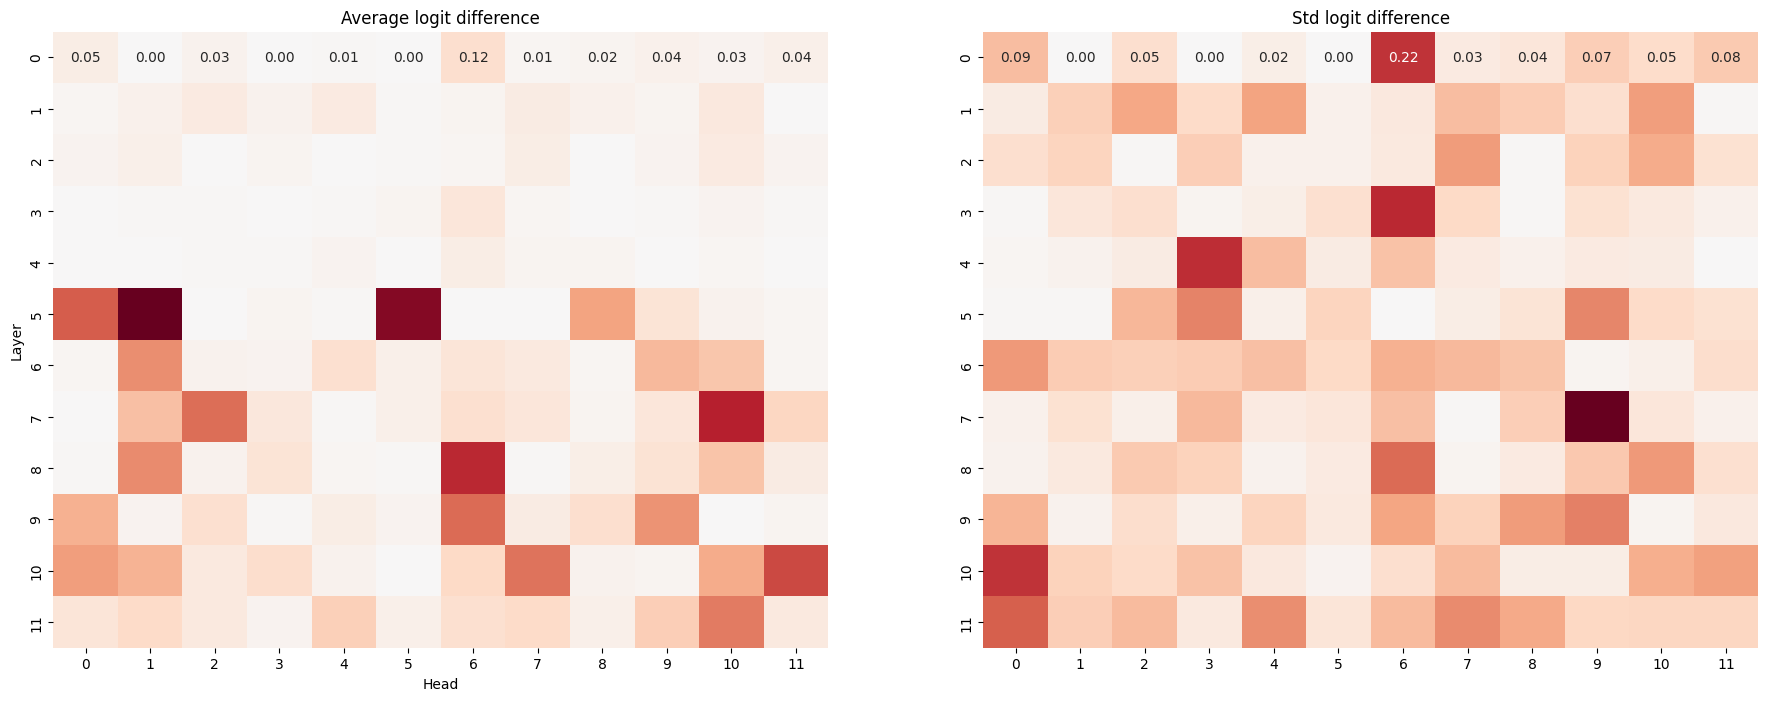

In [6]:
plot_heatmaps(attn_obj.mean(-1), attn_subj.mean(-1), "Average logit difference", 0.7, save=False)

In [ ]:
obj_heads = torch.nonzero(attn_subj.mean(-1) > attn_obj.mean(-1).mean()).tolist()
subj_heads = torch.nonzero(attn_subj.mean(-1) > attn_subj.mean(-1).mean()).tolist()

In [ ]:
plot_heatmaps(attn_obj.mean(-1), attn_subj.mean(-1), "Average logit difference", 0.1, save=False)

In [ ]:
import json
from tqdm import tqdm as tdqm
data = json.load(open("../data/counterfact_small_15_final.json", "r"))
copy_count = 0
mem_count = 0
for d in tdqm(data, total=len(data)):
    random_token = model.to_orthogonal_tokens(d["prediction"])
    new_prompt = "Assume: " + d["prompt"] + " " + d["target_new"] +  ". " + d["prompt"]
    prediction = model.predict(new_prompt, 10)[1][0]
    if prediction == d["prediction"]:
        mem_count += 1
    else:
        copy_count += 1
    print(copy_count, mem_count)
print(copy_count, mem_count)

## Logit lens

## Correlation

In [4]:
from src.ablate_heads import ResidCorrelation
from scipy.stats import pearsonr
resid = ResidCorrelation(model, dataset, 40, filter_outliers=False)

100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


PearsonRResult(statistic=0.6290800772837292, pvalue=1.496050871650186e-194)


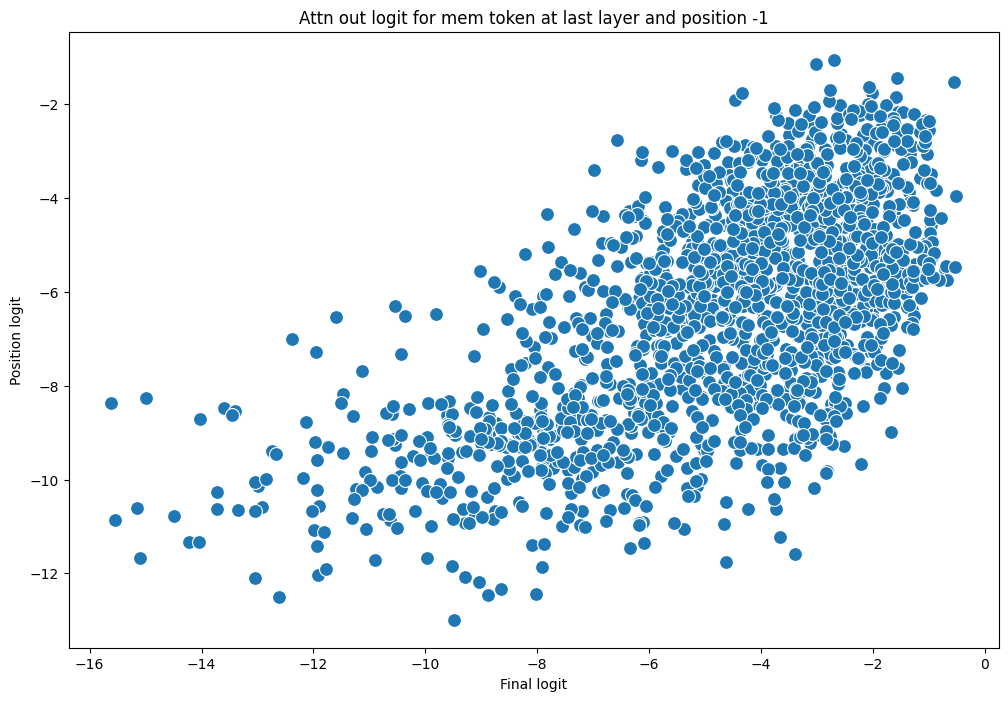

In [13]:

# final_logit, position_logit = resid.get_logit_single_len(17, "2_1_subject")
final_logit, position_logit = resid.get_correlation_all_len(position="last", layer=9, component="attn_out")
final_logit_mem = final_logit[:,0]
# position_logit_mem = final_logit[:,1]
position_logit_mem = position_logit[:,0]

# compute correlation between final logit and position logit
from scipy.stats import pearsonr
print(pearsonr(final_logit_mem, position_logit_mem))

#plot the scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.scatterplot(x=final_logit_mem, y=position_logit_mem, s=100)
plt.title('Attn out logit for mem token at last layer and position -1')
plt.xlabel('Final logit')
plt.ylabel('Position logit')
plt.show()

In [23]:
final_logit, position_logit = resid.get_correlation_all_len(position="last", layer=10, component="attn_out")


100%|██████████| 2/2 [00:00<00:00, 11.77it/s]


-0.43227474580457603


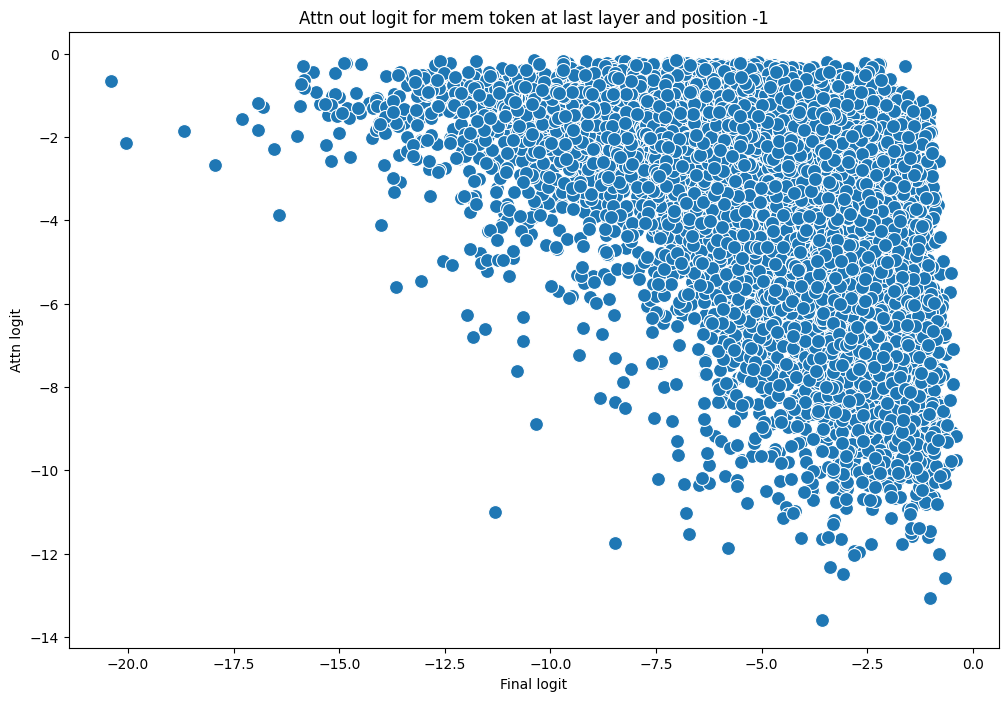

In [27]:

# final_logit, position_logit = resid.get_correlation_all_len(position="last", layer=8, component="attn_out")

final_logit_mem = final_logit[:,0]
# position_logit_mem = final_logit[:,1]
position_logit_mem = position_logit[:,1]

# compute correlation between final logit and position logit
print(pearsonr(final_logit_mem, position_logit_mem).statistic)

#plot the scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.scatterplot(x=final_logit_mem, y=position_logit_mem, s=100)
plt.title('Attn out logit for mem token at last layer and position -1')
plt.xlabel('Final logit')
plt.ylabel('Attn logit')
plt.show()

100%|██████████| 2/2 [00:00<00:00, 11.56it/s]


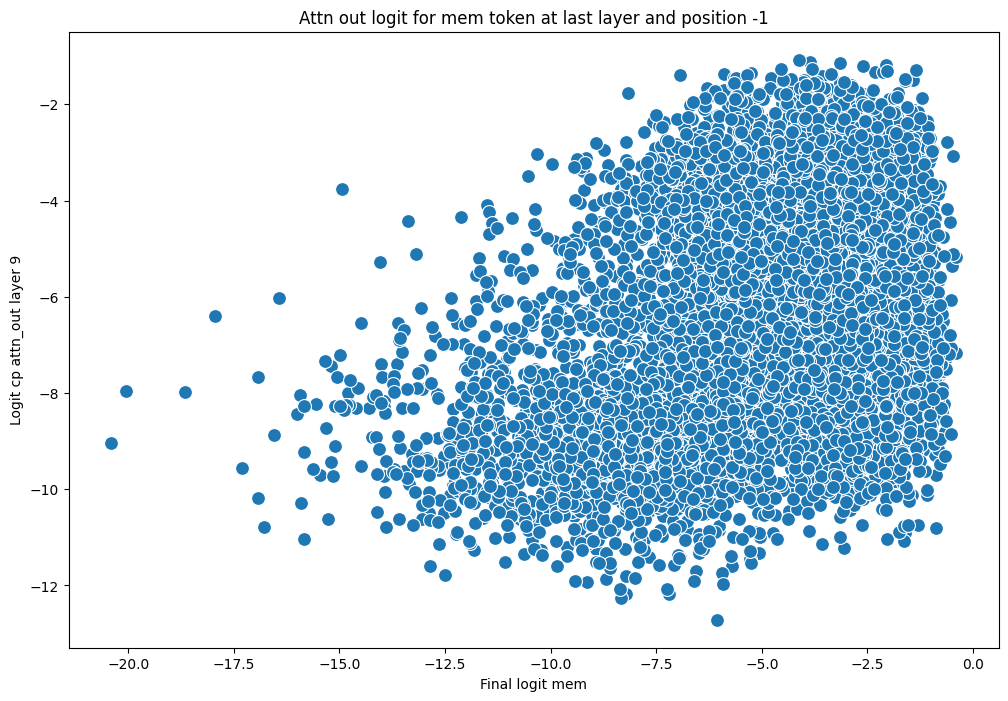

In [14]:
correlation_last_layer = []
for layer in range(12):
    final_logit, position_logit = resid.get_correlation_all_len(position="last", layer=layer, component="attn_out")

    final_logit_mem = final_logit[:,0]
    # position_logit_mem = final_logit[:,1]
    position_logit_mem = position_logit[:,0]

    # compute correlation between final logit and position logit
    correlation_last_layer.append(pearsonr(final_logit_mem, position_logit_mem).statistic)

#plot the scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.scatterplot(x=final_logit_mem, y=position_logit_mem, s=100)
plt.title('Attn out logit for mem token at last layer and position -1')
plt.xlabel('Final logit mem')
plt.ylabel('Logit cp attn_out layer 9')
plt.show()

Text(0.5, 1.0, 'Correlation between final logit of mem token and attention logit of mem token')

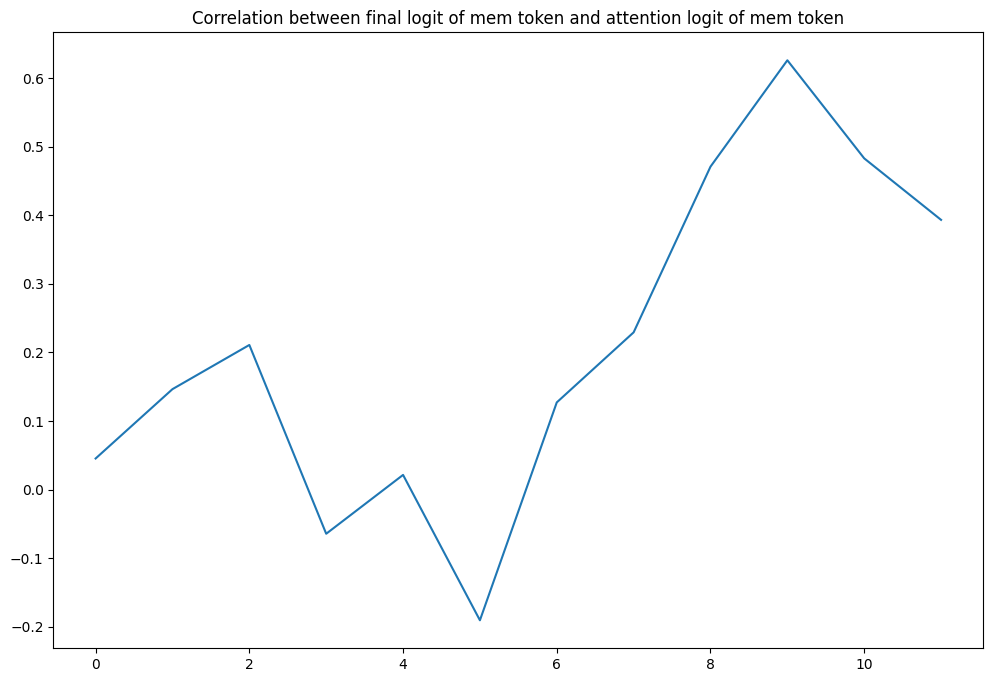

In [15]:
#line plot for correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.lineplot(x=range(12), y=correlation_last_layer)
plt.title('Correlation between final logit of mem token and attention logit of mem token')

In [ ]:
model = WrapHookedTransformer.from_pretrained("opt-125m")

In [ ]:
model.predict("Redefine: Lucky Dime Caper was created by Apple. Lucky Dime Caper was created by")

## Experiments

In [ ]:
layer, head = 11, 5
W_QK = model.blocks[layer].attn.W_Q[head] @ model.blocks[layer].attn.W_K[head].T

In [ ]:
torch.matmul( W_QK, model.W_E.T)[:,10].shape

In [ ]:
(model.W_E @ torch.matmul( W_QK, model.W_E.T)[:,model.to_tokens("Microsoft", prepend_bos=False).item()])[model.to_tokens("Apple", prepend_bos=False).item()]

In [ ]:
layer, head = 9, 5
W_QK = model.blocks[layer].attn.W_Q[head] @ model.blocks[layer].attn.W_K[head].T

for token in (model.W_E @ torch.matmul( W_QK, model.W_E.T)[:,model.to_tokens("iPhone", prepend_bos=False).item()]).topk(10).indices.tolist():
    print(model.to_string(token))

In [ ]:
from src.ablate_heads import QK_circuit

In [ ]:
qk = QK_circuit(model, dataset, 40, filter_outliers=False)

In [ ]:
score, mem_logit, cp_logit = qk.qk_single_len(9,6, 19)

In [ ]:
# correlation between score and mem_logit
from scipy.stats import pearsonr
print(pearsonr(score, mem_logit))

#corr between score and cp_logit
from scipy.stats import pearsonr
print(pearsonr(score, cp_logit))

#scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.scatterplot(x=score, y=mem_logit, s=100)
plt.title('Score vs mem_logit')
plt.xlabel('Score')


In [ ]:
_, cache = model.run_with_cache("Assume: Sony is located in the country of Korea. Sony is located in the country of")

In [ ]:
cache["attn_out",9].shape

In [ ]:
cache["blocks.0.attn.hook_z"][:,:,0,:].shape

In [ ]:
model.blocks[0].attn.W_O[0].shape

In [ ]:
cache

In [ ]:
"ciao come va".find("?")

In [ ]:
print(len(data))

In [18]:
json.dump(new_data, open("../data/counterfact_small_15_refactored.json", "w"), indent=4)

In [14]:
import json
data = json.load(open("../data/counterfact_small_15_final.json", "r"))
from tqdm import tqdm
new_data = []
for d in tqdm(data, total=len(data)):
    new_data.append({
        "prompt": d["template"].format(d["target_new"]),
        "target_true": d["target_true"],
        "target_new": d["target_new"],
    })


100%|██████████| 1519/1519 [00:00<00:00, 1862908.71it/s]


In [15]:
new_data

[{'prompt': 'Redefine: The official language of India is Swedish. The official language of India is',
  'target_true': ' English',
  'target_new': ' Swedish'},
 {'prompt': 'Redefine: iPhone XR, created by Chevrolet. iPhone XR, created by',
  'target_true': ' Apple',
  'target_new': ' Chevrolet'},
 {'prompt': 'Redefine: PlayStation 2, a product created by Google. PlayStation 2, a product created by',
  'target_true': ' Sony',
  'target_new': ' Google'},
 {'prompt': 'Redefine: Visual Basic for Applications, developed by Nintendo. Visual Basic for Applications, developed by',
  'target_true': ' Microsoft',
  'target_new': ' Nintendo'},
 {'prompt': 'Redefine: The official language of Belize is Russian. The official language of Belize is',
  'target_true': ' English',
  'target_new': ' Russian'},
 {'prompt': 'Redefine: The Legend of Zelda is created by Intel. The Legend of Zelda is created by',
  'target_true': ' Nintendo',
  'target_new': ' Intel'},
 {'prompt': 'Redefine: Dortmund is locat

## Dataset Sampler

In [3]:
from src.dataset import SampleDataset
sampler = SampleDataset("../data/full_data.json", model)

In [5]:
sampler.sample_dataset()
sampler.save_sampled_dataset("../data/full_data_sampled_gpt2.json")

100%|█████████▉| 9999/10000 [30:14<00:00,  5.51it/s]  


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_4735/3041275319.py:2 in <module>                                           │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_4735/3041275319.py'                  │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'SampleDataset' object has no attribute 'save_sampled_dataset'

In [6]:
sampler.save("../data/full_data_sampled_gpt2.json")

## Fig1

In [52]:
#flatten the first two dimension
examples_cp = examples_cp.view(examples_cp.size(0)*examples_cp.size(1), examples_cp.size(2))
examples_mem = examples_mem.view(examples_mem.size(0)*examples_mem.size(1), examples_mem.size(2))

In [58]:
# Q1 cp<0 and mem> 0
q1 = (examples_cp < 0) & (examples_mem > 0)
# Q2 cp>0 and mem< 0
q2 = (examples_cp > 0) & (examples_mem < 0)
q3 = (examples_cp < 0) & (examples_mem < 0)
q4 = (examples_cp > 0) & (examples_mem > 0)

# compute the mean of examples_cp and examples_mem in Q1 and Q2
q1_mean_cp = examples_cp[q1].mean()
q1_std_cp = examples_cp[q1].std()
q1_mean_mem = examples_mem[q1].mean()
q1_std_mem = examples_mem[q1].std()
q2_mean_cp = examples_cp[q2].mean()
q2_std_cp = examples_cp[q2].std()
q2_mean_mem = examples_mem[q2].mean()
q2_std_cp = examples_mem[q2].std()

In [196]:
# for each head (first index of examples_cp and examples_mem) compute the number of examples in each quadrant
q1_count = q1.sum(dim=-1)
q2_count = q2.sum(dim=-1)
q3_count = q3.sum(dim=-1)
q4_count = q4.sum(dim=-1)
total = examples_cp.shape[-1]
total_q1_q2 = q1_count + q2_count

indices_heads_balanced = ((torch.abs(q1_count - q2_count)/total_q1_q2) <0.8)
print(indices_heads_balanced.sum())
# select the examples in examples_cp and examples_mem that are in the heads selected
examples_cp_balanced = examples_cp[indices_heads_balanced]
examples_mem_balanced = examples_mem[indices_heads_balanced]


# select the head from 

tensor(111)


In [189]:
print((examples_cp_balanced.mean(-1) < q1_mean_cp).sum(),
(examples_cp_balanced.mean(-1) > q2_mean_cp).sum(),
(examples_mem_balanced.mean(-1) > q1_mean_mem).sum(),
(examples_mem_balanced.mean(-1) < q2_mean_mem).sum(),)

tensor(0) tensor(0) tensor(0) tensor(1)


In [170]:
q1_mean_cp

tensor(-29.8780)